In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt


In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 70s 44ms/step - loss: 1.5577 - accuracy: 0.4286 - val_loss: 1.2660 - val_accuracy: 0.5420
Epoch 2/10
1563/1563 [==============================] - 65s 42ms/step - loss: 1.1765 - accuracy: 0.5828 - val_loss: 1.0765 - val_accuracy: 0.6214
Epoch 3/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.0228 - accuracy: 0.6387 - val_loss: 0.9987 - val_accuracy: 0.6503
Epoch 4/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.9287 - accuracy: 0.6727 - val_loss: 0.9943 - val_accuracy: 0.6531
Epoch 5/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8614 - accuracy: 0.6981 - val_loss: 0.9466 - val_accuracy: 0.6782
Epoch 6/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.8092 - accuracy: 0.7157 - val_loss: 0.8607 - val_accuracy: 0.7058
Epoch 7/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7651 - accuracy: 0.7320 - val_loss: 0.8795 -

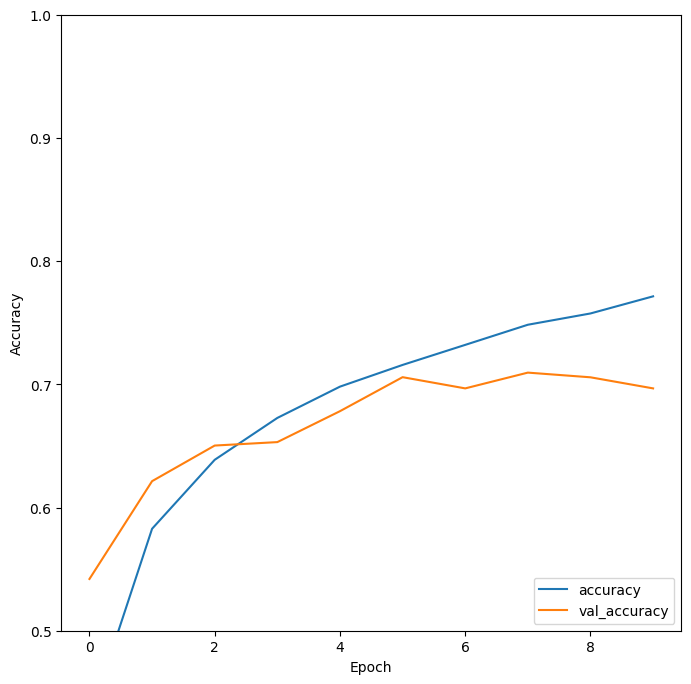

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')